# Introducción a diferencias finitas - Parte B
### Juan S. Hincapié - Carlos Duque-Daza

## ¿Qué es el método de diferencias finitas?

<div align='justify'> El método de las diferencias finitas es utilizado para calcular de manera numérica las soluciones a las ecuaciones diferenciales usando ecuaciones algebraicas. Lo primero que se debe hacer para empezar a usar este método es obtener los esquemas de diferencias finitas que reemplazaran las derivadas infinitesimales y luego, aplicar dichos esquemas en cada uno de los nodos del dominio discretizado. ¿Cómo se obtienen los esquemas? Usando la serie de Taylor</div>

## Esquemas espaciales
Las más conocidas son:

$$
\begin{aligned}
& \text{Forward Finite Difference: } \frac{d\phi}{dx} \approx \frac{\phi_{i+1}-\phi_{i}}{\Delta x} +  O(\Delta x) \\
& \text{Backward Finite Difference: }    \frac{d\phi}{dx} \approx \frac{\phi_{i}-\phi_{i-1}}{\Delta x} +  O(\Delta x) \\
& \text{Central Finite Difference: } \frac{d\phi}{dx} \approx \frac{\phi_{i+1}-\phi_{i-1}}{2\Delta x} +  O(\Delta x)^2 
\end{aligned}
$$

## Esquemas temporales

<div align='justify'> Los esquemas anteriores sirven para aproximar derivadas espaciales. ¿Qué hacemos con las derivadas temporales? Debemos seguir usando Euler en sus diferentes versiones:</div>

Tenindo la siguiente EDP:
$$
\frac{d\phi}{dt} = f (t,x,\phi)
$$

Esquema explícito (Euler hacia adelante):
$$
    \frac{\phi^{n+1}_{i}-\phi^{n}_{i}}{\Delta t} = f_i^{n} (t,x,\phi)
$$

Esquema implícito (Euler hacia atrás):
$$
    \frac{\phi^{n+1}_{i}-\phi^{n}_{i}}{\Delta t} = f_i^{n+1} (t,x,\phi)
$$

## ¡Suubámosle el nivel!

* Discretice la EDP de transporte convectivo usando el esquema implícito para las derivadas parciales temporales, y esquemas de diferencias finitas hacia atrás para las derivadas parciales espaciales.


$$
    \frac{\partial \phi}{\partial t} + c \frac{\partial \phi}{\partial x}  = 0
$$

Las condiciones de frontera:
* $\phi(t,0) = 0$ y  $\phi(t,2) = 0$

Condiciones iniciales:
* $\phi = 2$ para $0.5 \leq x \leq 1.0$ y $\phi = 0$ en el resto del dominio


## ¿Por dónde empezamos?

Nuestro dominio espacial 1D tiene 6 nodos:

<div align='center'> 0--------1--------2--------3--------4--------5--------6</div><br>

<div align='justify'>Empezamos resolviendo las ecuaciones desde el nodo 1, dado que el valor de la velocidad en el nodo 0 ya se conoce por la condición de Dirichlet. </div>

\begin{align*}
    & i=1 \rightarrow - CFL \, \phi^{n+1}_{0} + \phi^{n+1}_{1} + CFL\, \phi^{n+1}_{1} = \phi^{n}_{1}\\
    & i=2 \rightarrow - CFL \, \phi^{n+1}_{1} + \phi^{n+1}_{2} + CFL\, \phi^{n+1}_{2} = \phi^{n}_{2} \\
    & \vdots \\
    & i=5 \rightarrow - CFL \, \phi^{n+1}_{4} + \phi^{n+1}_{5} + CFL \, \phi^{n+1}_{5} = \phi^{n}_{5}
\end{align*}


<div align='justify'>¿Cómo podemos representar este sistema de ecuaciones de manera matricial? Lo primero es factorizar por factor común: </div>

\begin{align*}
    & i=1 \rightarrow -CFL \, \phi^{n+1}_{0} + (1+CFL)\phi^{n+1}_{1} = \phi^{n}_{1}\\
    & i=2 \rightarrow -CFL \, \phi^{n+1}_{1} + (1+CFL)\phi^{n+1}_{2} = \phi^{n}_{2} \\
    & \vdots \\
    & i=6 \rightarrow - CFL \, \phi^{n+1}_{4} + (1+CFL)\phi^{n+1}_{5} = \phi^{n}_{5}
\end{align*}

Posteriormente pasamos a la derecha las velocidades que conocemos por las condiciones del tipo Dirichlet. Para este caso en particula, sólo pasamos a la derecha el término $ CFL \, \phi^{n+1}_{0}$:
\begin{align*}
    & i=1 \rightarrow (1+CFL)\phi^{n+1}_{1} = \phi^{n}_{1}  + CFL \phi^{n+1}_{0}\\
    & i=2 \rightarrow -CFL \, \phi^{n+1}_{1} + (1+CFL)\phi^{n+1}_{2} = \phi^{n}_{2} \\
    & \vdots \\
    & i=6 \rightarrow -CFL \, \phi^{n+1}_{4} + (1+CFL)\phi^{n+1}_{5} = \phi^{n}_{5}
\end{align*}


<div align='justify'>Luego, montamos nuestra matriz de coefieciente, que va a estar multiplicada por el vector de incógnitas del sistema e igualada al vector de velocidad del presente:</div>

$$
\left[\begin{array}{ccccccc}
(1+ CFL) & 0 & 0 & 0 & 0   \\
-CFL & (1+CFL) & 0 & 0 & 0   \\
0 & -CFL & (1+CFL) & 0 & 0   \\
0 & 0 & -CFL & (1+CFL) & 0   \\
0 & 0 & 0 & -CFL & (1+CFL)   \\
\end{array}\right]\cdot
\left[\begin{array}{c}
\phi_{1}\\
\phi_{2}\\
\phi_{3}\\
\phi_{4}\\
\phi_{5}
\end{array}\right] ^{\,n+1} = 
\left[\begin{array}{c}
\phi^n_{1}+CFL\, \phi^{n+1}_{0}\\
\phi^n_{2}\\
\phi^n_{3}\\
\phi^n_{4}\\
\phi^n_{5}
\end{array}\right]
$$

<div align='justify'>¿Qué se debe hacer para resolver este sistema de ecuaciones?</div>

In [19]:
import numpy as np
import matplotlib.pyplot as plt

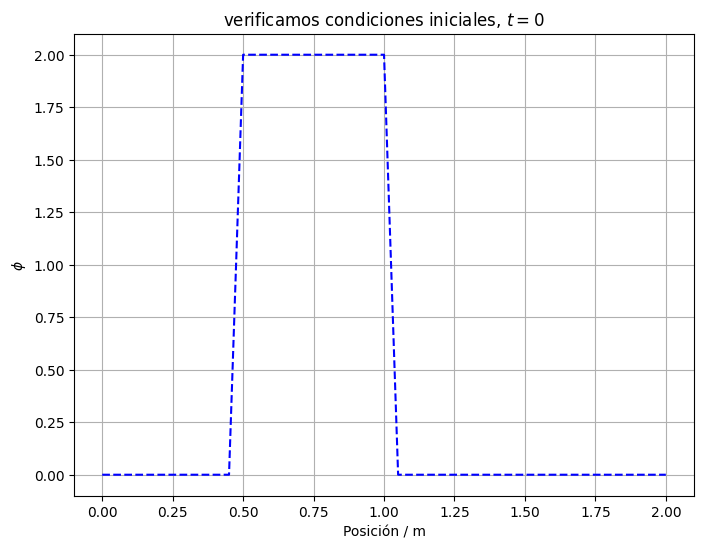

In [ ]:
# Paso 00: discretizar el dominio espacial
x0 = 0; xf = 2; dx = 0.05


# Paso 01: discretizar el dominio temporal
t0 = 0; tf = 1.0; dt = 0.02


# Paso 02: asumir velocidad de la onda
c = 0.5

# Paso 03: crear vector de velocidad almacenar
# el valor de la velocidad en cada punto discreto


# Paso 04: incluimos condiciones inciales


# Paso 05: verificar condiciones iniciales


<div align='justify'>Antes de continuar con nuestro programa, es preciso respondernos la pregunta ¿Y cómo automatizo el llenado de la matriz de coeficientes? ¿Hay algún patrón para llenar la diagonal principal? ¿Hay algún patrón para llenar la diagonal que está a la izquierda de la diagonal principal?</div>

In [ ]:
# Paso 06: hacemos un vector de tiempo para almacenar el futuro

# Paso 08: creamos una matriz para almacenar los coeficientes


# Paso 09: llenamos la matriz


# Paso 09: resolvemos todo el problema
for n in range(1, len(t)-1):
    # Llenamos el vector de cargas

    # Resolvemos sistema de ecauciones

    # Actualizamos

    

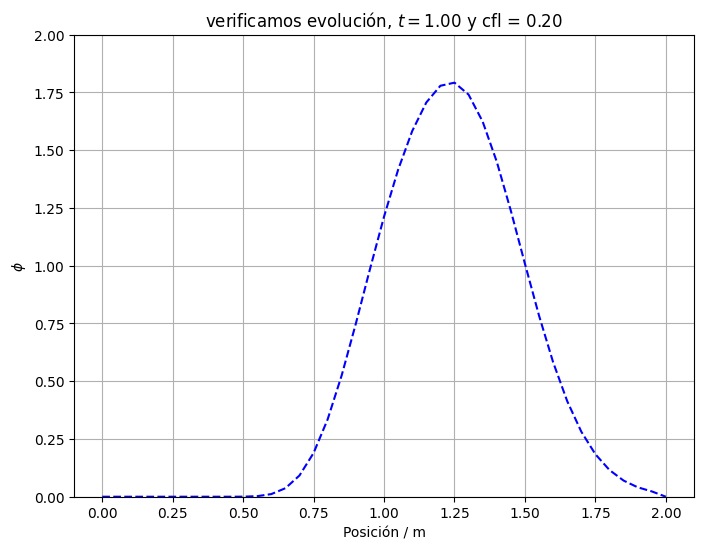

In [ ]:
# Paso 09: plotear


### Actividad
* ¿Podría poner el solucionador en una función? Así queda más fácil y se pueden hacer experimentos numéricos
* ¿Qué ocurre si $dt=0.05$, $dx=0.05$ y $c = 1.0 \, m/s$?
* ¿Qué ocurre si $dt=0.05$, $dx=0.05$ y $c = 1.2 \, m/s$?

In [ ]:
def solucionador01(x0,xf,dx,t0,tf,dt,c):

        
    return phiFut

In [52]:
x0 = 0; xf = 2; dx = 0.05
t0 = 0; tf = 0.2; dt = 0.05
c = 2.0

phiFut = solucionador01(x0,xf,dx,t0,tf,dt,c)

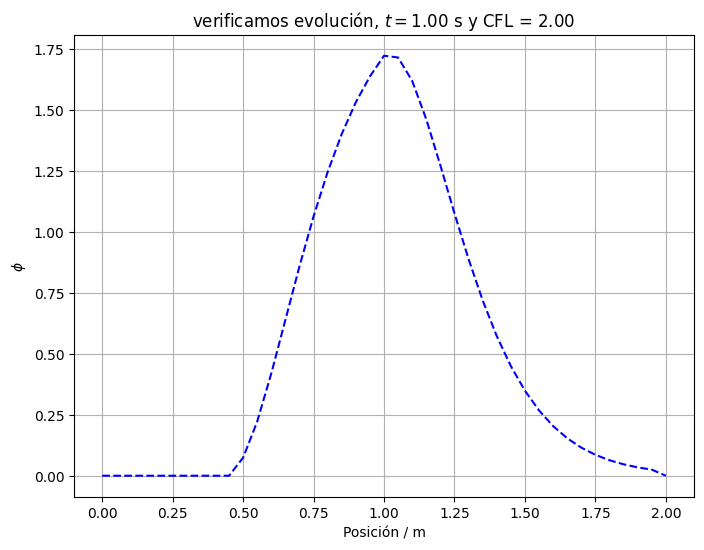